In [1]:
#Importing our dataset from csv file
import pandas as pd 

dataset=pd.read_csv("titanic-passengers.csv", sep=";")

#importing relevant libraries
from sklearn.model_selection import train_test_split
   
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy
from matplotlib import pyplot as plt

#Preprocessing our data
def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    return new_data
data=preprocess_data(dataset)
print(data)

     PassengerId  Survived  Pclass  \
0            343         0       2   
1             76         0       3   
2            641         0       3   
3            568         0       3   
4            672         0       1   
..           ...       ...     ...   
886           10         1       2   
887           61         0       3   
888          535         0       3   
889          102         0       3   
890          428         1       2   

                                                  Name  Sex        Age  SibSp  \
0                           Collander, Mr. Erik Gustaf    1  28.000000      0   
1                              Moen, Mr. Sigurd Hansen    1  25.000000      0   
2                               Jensen, Mr. Hans Peder    1  20.000000      0   
3          Palsson, Mrs. Nils (Alma Cornelia Berglund)    0  29.000000      0   
4                               Davidson, Mr. Thornton    1  31.000000      1   
..                                                 ...  .

In [2]:
#features extraction
x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y= data["Survived"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

#applying tree algorithm
tree = DecisionTreeClassifier()  
tree.fit(x_train, y_train)   #fitting our model
y_pred=tree.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.776536312849162


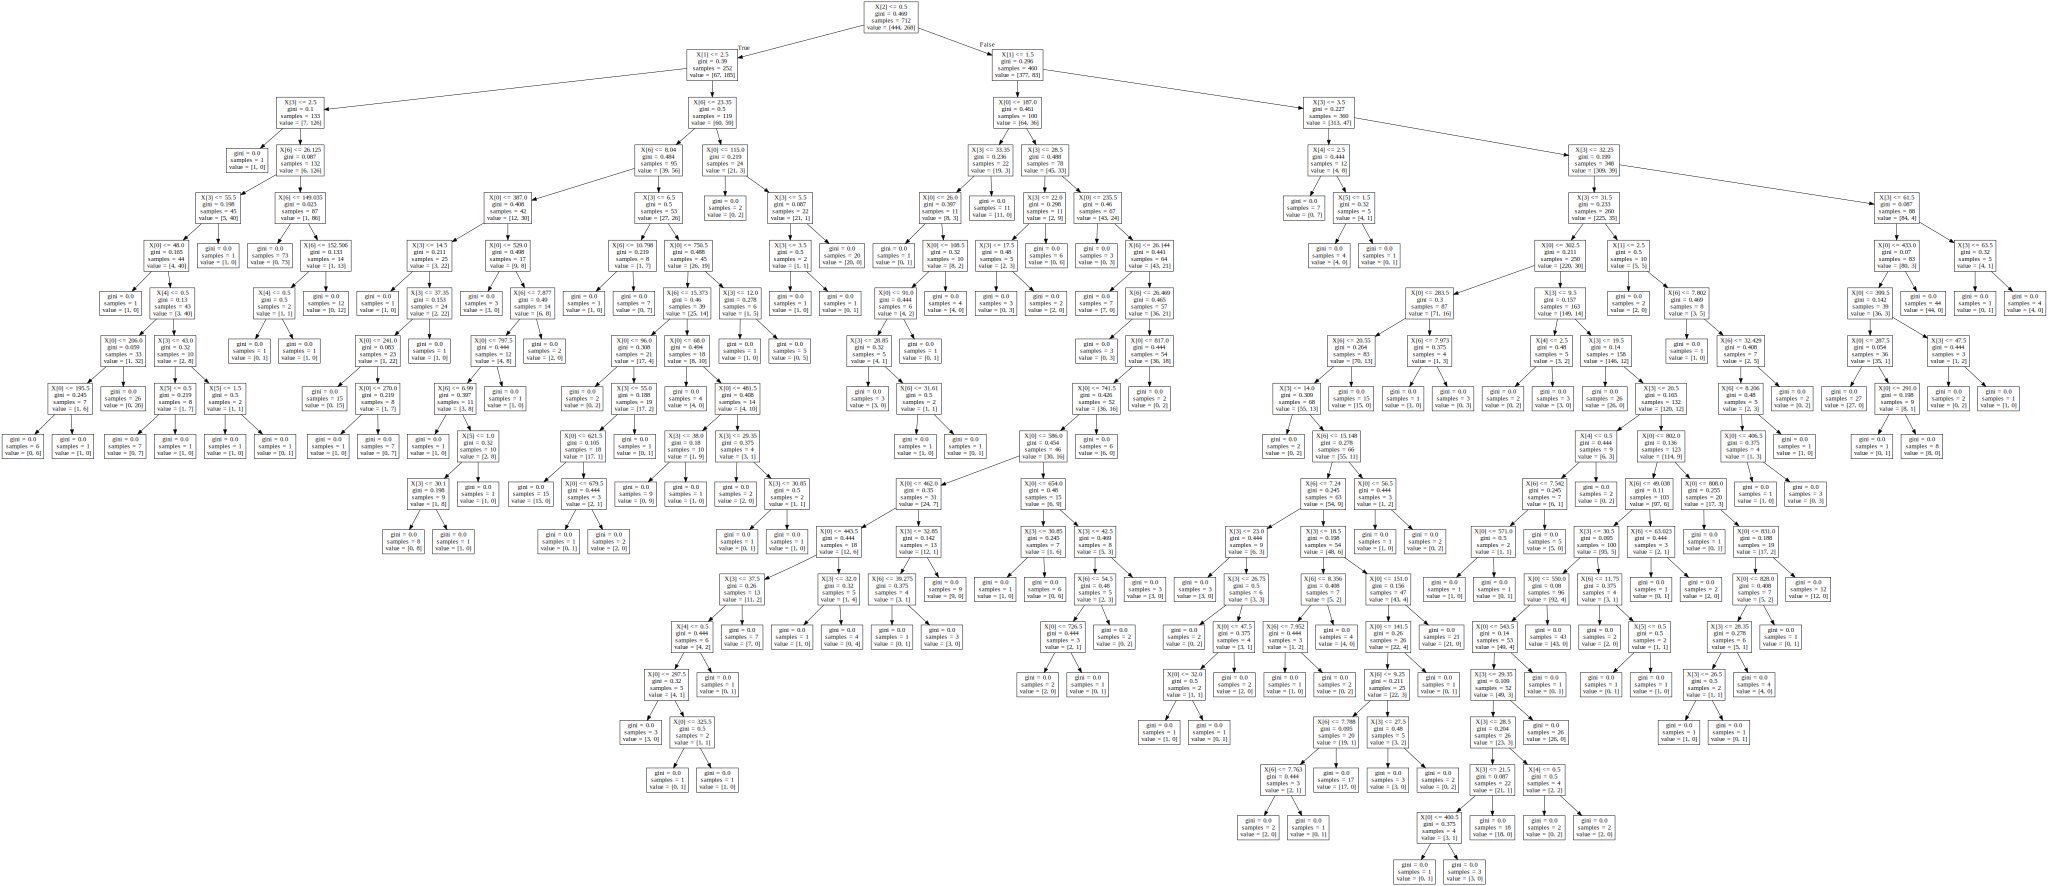

In [3]:
import graphviz
dot_data = export_graphviz(tree, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("data")
graph

In [4]:

#features extraction
x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked", "Age", "Fare"], axis=1)
y= data["Survived"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

#applying tree algorithm
#tree = tree.DecisionTreeClassifier()  
tree.fit(x_train, y_train)   #fitting our model
y_pred=tree.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7150837988826816


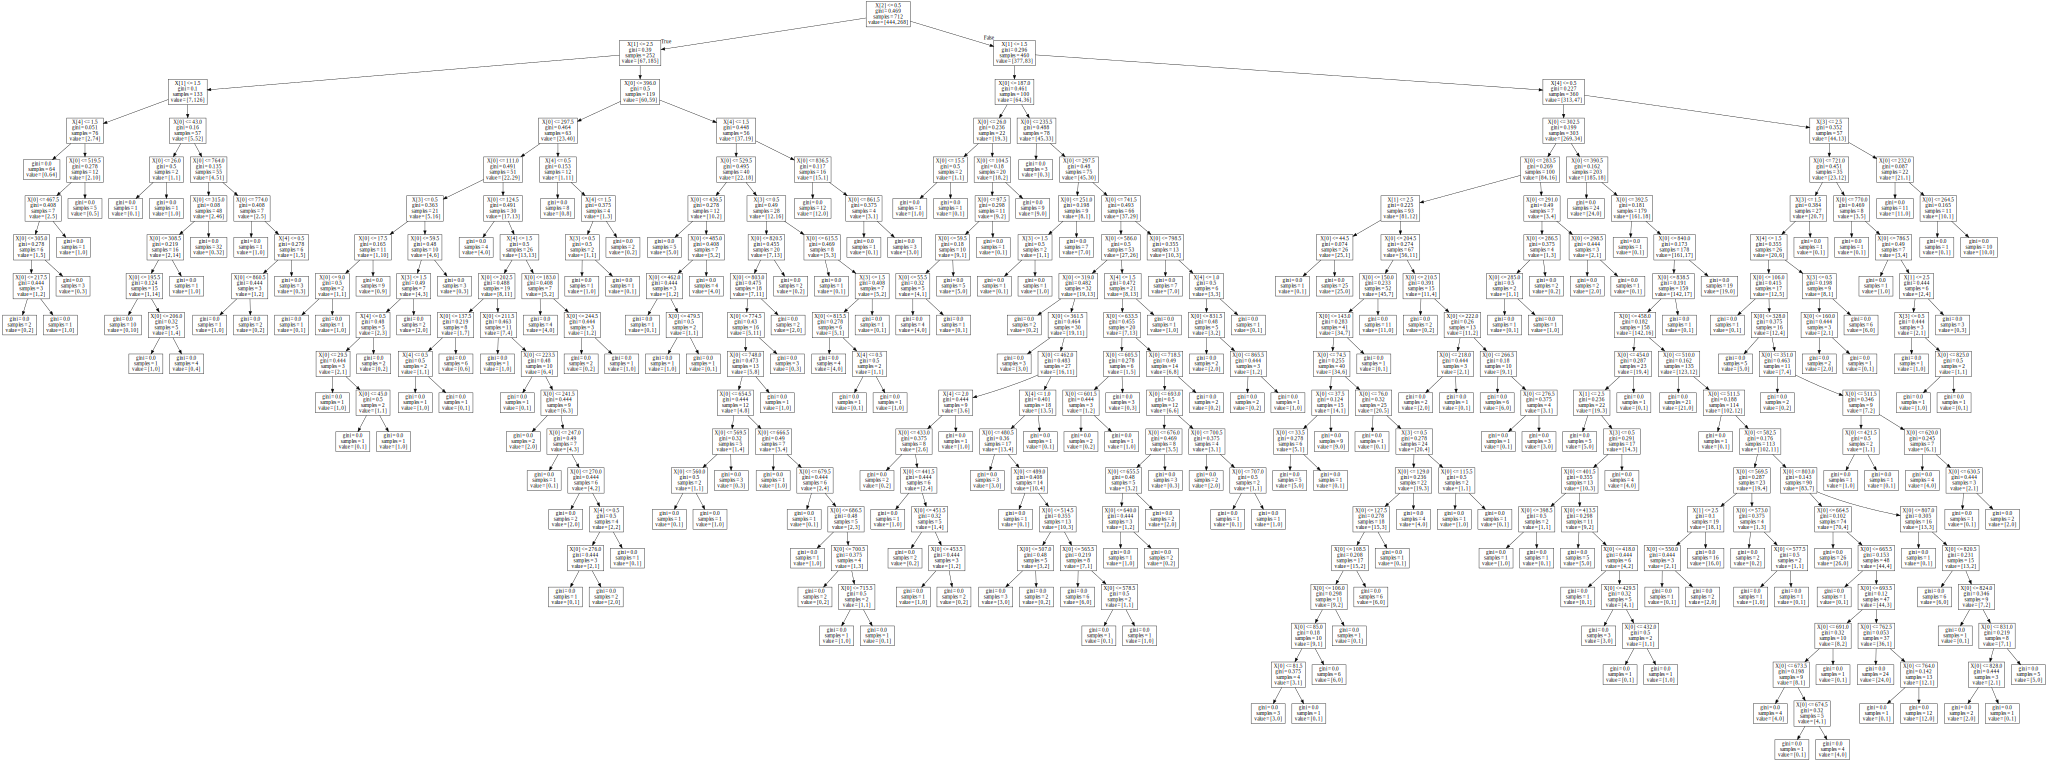

In [8]:
import graphviz
dot_data = export_graphviz(tree, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("data")
graph

In [5]:
clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.7541899441340782


In [13]:
clf=RandomForestClassifier(n_estimators=20)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.7430167597765364


In [14]:
clf=RandomForestClassifier(n_estimators=50)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.7486033519553073


In [15]:
# In conclusion, when I compare D-Tree (4 parameters) 0.7765 > Random forest 0.7542
# when I take D-Tree (6 parameters) 0.7150 < Random forest 0.7542
# When I increased the estimators in Random forest results was nearly similar. 
# When ever we add or remove parameters in D-Tree results will be significant change comparing to random forest.